In [1]:
import sys
sys.path.insert(0, '/Volumes/GoogleDrive/.shortcut-targets-by-id/1TlzU2Kb_sVqH6O3SZ_gaC4kqBXYYltvK/All_women Data Sience/_functions_')

from functions_plot_EDA import *
from fx_MLRegression import *

In [2]:
df_wt = pd.read_csv('../_datasets/3.1._WT_2017_wt1.csv',parse_dates =[1], delimiter=',', skipinitialspace = True, decimal ='.')
df_wt

,turbine,time,wind_avg_ms,wind_max_ms,wind_min_ms,rot_speed_avg_1m,rot_speed_max_1m,rot_speed_min_1m,power_avg_kw,power_max_kw,power_min_kw,power_wind_kw,power_tech_kw,power_forcemaj_kw,power_ext_kw,tot_en_prod_kwh,en_prod_kwh,blade_angle,op_hours,nacelle_pos
0,WT1,2017-01-01 00:10:00,6.2,7.2,5.5,9.39,9.63,9.06,638,689,544,638,638,638,638,24353178,104,1.0,1180 days 14:40:00,240
1,WT1,2017-01-01 00:20:00,6.2,7.4,5.5,9.53,9.79,9.17,666,721,593,666,666,666,666,24353286,108,1.0,1180 days 14:50:00,242
2,WT1,2017-01-01 00:30:00,6.2,7.3,5.3,9.17,9.54,8.81,594,670,499,596,596,596,596,24353381,95,1.0,1180 days 15:00:00,243
3,WT1,2017-01-01 00:40:00,6.1,7.3,4.9,8.61,9.04,8.28,480,567,412,482,482,482,482,24353458,77,1.0,1180 days 15:10:00,237
4,WT1,2017-01-01 00:50:00,5.8,7.7,4.7,8.48,8.80,8.17,454,518,390,455,455,455,455,24353531,73,1.0,1180 days 15:20:00,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52252,WT1,2017-12-31 23:10:00,14.0,19.5,10.0,14.68,15.39,13.86,3069,3131,3001,3070,3070,3070,3070,31893213,510,11.7,1515 days 04:42:00,204
52253,WT1,2017-12-31 23:20:00,13.5,17.3,9.2,14.70,15.67,14.12,3068,3119,2899,3070,3070,3070,3070,31893723,510,8.9,1515 days 04:52:00,209
52254,WT1,2017-12-31 23:30:00,14.3,19.5,8.0,14.69,15.78,14.07,3070,3121,3014,3070,3070,3070,3070,31894234,511,11.0,1515 days 05:02:00,210
52255,WT1,2017-12-31 23:40:00,13.8,19.4,8.7,14.69,15.33,13.95,3069,3114,3016,3070,3070,3070,3070,31894744,510,9.3,1515 days 05:12:00,210


In [3]:
df_weather = pd.read_csv('../_datasets/3.1._completeweather_2017.csv',parse_dates =[0], delimiter=',', skipinitialspace = True, decimal ='.')
df_weather

,time,windspeed_gr,direct_ground,atmo_press_hpa,air_t,tm_5cm,rel_hum_2m,dew_t_2m,year
0,2017-01-01 00:00:00,3.4,230,982.1,-3.9,-5.5,85.3,-6.0,2017
1,2017-01-01 00:10:00,3.1,230,981.9,-3.9,-5.6,85.8,-5.9,2017
2,2017-01-01 00:20:00,2.7,230,981.7,-4.1,-5.8,86.2,-6.1,2017
3,2017-01-01 00:30:00,2.9,220,981.6,-4.1,-5.8,85.8,-6.1,2017
4,2017-01-01 00:40:00,3.5,230,981.5,-4.0,-5.7,83.7,-6.4,2017
...,...,...,...,...,...,...,...,...,...
50964,2017-12-31 23:10:00,7.9,220,957.3,10.3,8.2,73.3,5.7,2017
50965,2017-12-31 23:20:00,8.2,220,957.3,10.1,8.7,74.5,5.8,2017
50966,2017-12-31 23:30:00,7.9,220,957.3,10.3,8.5,72.5,5.6,2017
50967,2017-12-31 23:40:00,7.9,220,957.2,10.3,8.7,72.2,5.5,2017


In [4]:
df = pd.merge(df_wt,df_weather,on='time', how='left')
df

,turbine,time,wind_avg_ms,wind_max_ms,wind_min_ms,rot_speed_avg_1m,rot_speed_max_1m,rot_speed_min_1m,power_avg_kw,power_max_kw,...,op_hours,nacelle_pos,windspeed_gr,direct_ground,atmo_press_hpa,air_t,tm_5cm,rel_hum_2m,dew_t_2m,year
0,WT1,2017-01-01 00:10:00,6.2,7.2,5.5,9.39,9.63,9.06,638,689,...,1180 days 14:40:00,240,3.1,230.0,981.9,-3.9,-5.6,85.8,-5.9,2017.0
1,WT1,2017-01-01 00:20:00,6.2,7.4,5.5,9.53,9.79,9.17,666,721,...,1180 days 14:50:00,242,2.7,230.0,981.7,-4.1,-5.8,86.2,-6.1,2017.0
2,WT1,2017-01-01 00:30:00,6.2,7.3,5.3,9.17,9.54,8.81,594,670,...,1180 days 15:00:00,243,2.9,220.0,981.6,-4.1,-5.8,85.8,-6.1,2017.0
3,WT1,2017-01-01 00:40:00,6.1,7.3,4.9,8.61,9.04,8.28,480,567,...,1180 days 15:10:00,237,3.5,230.0,981.5,-4.0,-5.7,83.7,-6.4,2017.0
4,WT1,2017-01-01 00:50:00,5.8,7.7,4.7,8.48,8.80,8.17,454,518,...,1180 days 15:20:00,225,3.8,230.0,981.5,-3.9,-5.6,80.5,-6.8,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52252,WT1,2017-12-31 23:10:00,14.0,19.5,10.0,14.68,15.39,13.86,3069,3131,...,1515 days 04:42:00,204,7.9,220.0,957.3,10.3,8.2,73.3,5.7,2017.0
52253,WT1,2017-12-31 23:20:00,13.5,17.3,9.2,14.70,15.67,14.12,3068,3119,...,1515 days 04:52:00,209,8.2,220.0,957.3,10.1,8.7,74.5,5.8,2017.0
52254,WT1,2017-12-31 23:30:00,14.3,19.5,8.0,14.69,15.78,14.07,3070,3121,...,1515 days 05:02:00,210,7.9,220.0,957.3,10.3,8.5,72.5,5.6,2017.0
52255,WT1,2017-12-31 23:40:00,13.8,19.4,8.7,14.69,15.33,13.95,3069,3114,...,1515 days 05:12:00,210,7.9,220.0,957.2,10.3,8.7,72.2,5.5,2017.0


In [5]:
df.dropna(how='any',inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50657 entries, 0 to 52256
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   turbine            50657 non-null  object        
 1   time               50657 non-null  datetime64[ns]
 2   wind_avg_ms        50657 non-null  float64       
 3   wind_max_ms        50657 non-null  float64       
 4   wind_min_ms        50657 non-null  float64       
 5   rot_speed_avg_1m   50657 non-null  float64       
 6   rot_speed_max_1m   50657 non-null  float64       
 7   rot_speed_min_1m   50657 non-null  float64       
 8   power_avg_kw       50657 non-null  int64         
 9   power_max_kw       50657 non-null  int64         
 10  power_min_kw       50657 non-null  int64         
 11  power_wind_kw      50657 non-null  int64         
 12  power_tech_kw      50657 non-null  int64         
 13  power_forcemaj_kw  50657 non-null  int64         
 14  power_

In [6]:
df.to_csv('../_datasets/3.1.combined_WT1_weather.csv',index=False)

# Decission Tree Regression
##  Define the target variable

In [7]:
df.columns

Index(['turbine', 'time', 'wind_avg_ms', 'wind_max_ms', 'wind_min_ms',
       'rot_speed_avg_1m', 'rot_speed_max_1m', 'rot_speed_min_1m',
       'power_avg_kw', 'power_max_kw', 'power_min_kw', 'power_wind_kw',
       'power_tech_kw', 'power_forcemaj_kw', 'power_ext_kw', 'tot_en_prod_kwh',
       'en_prod_kwh', 'blade_angle', 'op_hours', 'nacelle_pos', 'windspeed_gr',
       'direct_ground', 'atmo_press_hpa', 'air_t', 'tm_5cm', 'rel_hum_2m',
       'dew_t_2m', 'year'],
      dtype='object')

In [8]:

features = ['windspeed_gr','atmo_press_hpa', 'air_t','rel_hum_2m']
target = ['en_prod_kwh']
X = df[features]
y = df[target]

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [10]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
tree = DecisionTreeRegressor(max_depth=20)

# Fit the model
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [12]:
dtr = Allmetrics(tree,X_train, y_train,X_test, y_test)
dtr

,MAE,MSE,RMSE,R2,CV_R2
Train,11.753441,1008.886764,31.762978,0.957022,0.44
Test,64.871826,12981.346932,113.935714,0.460490,NaN


In [13]:
from sklearn.model_selection import GridSearchCV

params = {"splitter":("best", "random"), 
    "max_depth":(list(range(20, 30,2))), 
    "min_samples_split":list(range(2,10,2)),
     "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          "max_features":("auto","log2","sqrt",None),
         }       

In [14]:
grid_search_cv = GridSearchCV(tree, params, n_jobs=-1, verbose=1, cv=10)

grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=20), n_jobs=-1,
             param_grid={'max_depth': [20, 22, 24, 26, 28],
                         'max_features': ('auto', 'log2', 'sqrt', None),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 4, 6, 8],
                         'splitter': ('best', 'random')},
             verbose=1)

In [15]:
grid_search_cv.best_params_

{'max_depth': 24,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'splitter': 'best'}

In [16]:
tuned_hyper_model= DecisionTreeRegressor(max_depth= 24,
 max_features= 'auto',
 min_samples_split= 8,
 min_samples_leaf= 6,
 splitter= 'best')

In [17]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=24, max_features='auto', min_samples_leaf=6,
                      min_samples_split=8)

In [18]:
dtr_tuned = Allmetrics(tuned_hyper_model,X_train, y_train,X_test, y_test)
dtr_tuned

,MAE,MSE,RMSE,R2,CV_R2
Train,44.515427,5029.304667,70.917591,0.785754,0.499
Test,67.960153,11555.836300,107.498076,0.519735,NaN


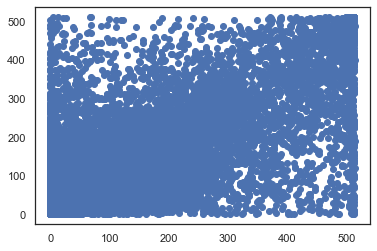

In [19]:
tuned_pred=tuned_hyper_model.predict(X_test)
plt.scatter(y_test,tuned_pred)